In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV

In [2]:
def rmse(predictor,target):
    return np.sqrt(((predictor - target) ** 2).mean())

In [3]:
df = pd.read_csv('../data/train.csv')

In [4]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
User_ID                       550068 non-null int64
Product_ID                    550068 non-null object
Gender                        550068 non-null object
Age                           550068 non-null object
Occupation                    550068 non-null int64
City_Category                 550068 non-null object
Stay_In_Current_City_Years    550068 non-null object
Marital_Status                550068 non-null int64
Product_Category_1            550068 non-null int64
Product_Category_2            376430 non-null float64
Product_Category_3            166821 non-null float64
Purchase                      550068 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
#Check for any null values
df.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [7]:
#Fill the null values with 0

df.fillna(0, inplace= True)

In [8]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0.0,0.0,7969


In [9]:
df = df.astype({'Product_Category_2': int, 'Product_Category_3': int})

In [10]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,0,0,7969


In [11]:
#Mapping gender values
gender = {'F':0, 'M':1}

df['Gender'] = df['Gender'].map(gender)
df = df.rename(columns={'Gender': 'isMale'})

In [12]:
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
1,1000001,P00248942,0,0-17,10,A,2,0,1,6,14,15200
2,1000001,P00087842,0,0-17,10,A,2,0,12,0,0,1422
3,1000001,P00085442,0,0-17,10,A,2,0,12,14,0,1057
4,1000002,P00285442,1,55+,16,C,4+,0,8,0,0,7969


In [13]:
df.sort_values('Age', inplace=True)
df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0-17,10,A,2,0,3,0,0,8370
48932,1001499,P00100442,1,0-17,10,C,1,0,2,4,5,13129
48933,1001499,P00255842,1,0-17,10,C,1,0,16,0,0,20195
48934,1001499,P00070342,1,0-17,10,C,1,0,1,2,14,15819
48935,1001499,P00275542,1,0-17,10,C,1,0,1,0,0,7587


In [14]:
df['Age'] = df['Age'].factorize()[0]

In [15]:
df.tail()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
47161,1001252,P00357242,1,6,13,C,3,0,5,0,0,7134
47162,1001252,P00322942,1,6,13,C,3,0,2,8,16,16325
114629,1005686,P00101942,1,6,16,A,1,1,8,17,0,4056
188070,1005033,P00112342,0,6,13,C,1,1,13,16,0,936
132077,1002280,P00004142,1,6,6,B,2,1,8,17,0,7900


Mapping Age column to dummy values:

0-17: 0<br>
18-25: 1<br>
26-35: 2<br>
36-45: 3<br>

46-50: 4

51-55: 5

55+ : 6


In [16]:
city = {'A': 1, 'B': 2, 'C':3}

df['City_Category'] = df['City_Category'].map(city)

df.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,1,2,0,3,0,0,8370
48932,1001499,P00100442,1,0,10,3,1,0,2,4,5,13129
48933,1001499,P00255842,1,0,10,3,1,0,16,0,0,20195
48934,1001499,P00070342,1,0,10,3,1,0,1,2,14,15819
48935,1001499,P00275542,1,0,10,3,1,0,1,0,0,7587


In [17]:
df['Stay_In_Current_City_Years'].replace({'4+':4}, inplace=True)

In [18]:
df['Product_ID'] = df['Product_ID'].str[1:] # Drop the first character ‘P’ from product id
df = df.astype({'Product_ID':int,'Stay_In_Current_City_Years':int}) # Recast all strings as ints

In [19]:
train, test = train_test_split(df,test_size=0.3)

In [20]:
X = train.drop('Purchase',axis=1)
y = train.Purchase

In [21]:
np.asarray(X)

array([[1001050,  260442,       1, ...,       1,      15,       0],
       [1004819,  104842,       1, ...,       8,       0,       0],
       [1001733,  267442,       1, ...,       1,       2,       5],
       ...,
       [1000058,  213242,       1, ...,       5,       8,       0],
       [1003577,  158842,       0, ...,       8,      14,       0],
       [1004411,  131542,       1, ...,       8,      12,       0]])

In [22]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()

In [23]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     6473.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:17:56   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385035   BIC:                         7.591e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                       -774.0051   4330.924     -0.179      0.858   -9262.486    7714.476
User_ID                        0.0104      0.004      2.410      0.016       0.002       0.019
Product_ID                    -0.0028   7.35e-05    -37.628      0.000      -0.003      -0.003
isMale                       501.4838     17.420     28.787      0.000     467.340     535.627
Age                          113.0725      5.861     19.293      0.000     101.586     124.559
Occupation                     5.1513      1.155      4.459      0.000       2.887       7.416
City_Category                322.7205      9.881     32.659      0.000     303.353     342.088
Stay_In_Current_City_Years     8.4847      5.781      1.468      0.142      -2.845      19.814
Marital_Status               -39.2101     15.929     -2.462      0.014     -70.431      -7.989
Product_Category_1          -346.9172      2.055   -168.837      0.000    -350.944    -342.890
Product_Category_2             9.5934      1.207      7.948      0.000       7.228      11.959
Product_Category_3           138.1699      1.303    106.011      0.000     135.615     140.724
==============================================================================
Omnibus:                    39843.014   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55445.823
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                       3.844   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Sta_In_Current_City_Years has a p-value >= 0.05, so it will be dropped.

In [24]:
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
X.head()

,User_ID,Product_ID,isMale,Age,Occupation,City_Category,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
6439,1001050,260442,1,2,1,2,0,1,15,0
147981,1004819,104842,1,3,18,2,0,8,0,0
205836,1001733,267442,1,1,14,2,1,1,2,5
385386,1005321,153742,1,2,4,3,0,8,0,0
457680,1004425,337542,1,3,7,2,0,5,14,0


In [25]:
multivar_model = sm.OLS(y,sm.add_constant(X)).fit()
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.156
Method:                 Least Squares   F-statistic:                     7120.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:17:57   Log-Likelihood:            -3.7953e+06
No. Observations:              385047   AIC:                         7.591e+06
Df Residuals:                  385036   BIC:                         7.591e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               -568.1888   4328.660     -0.131      0.896   -9052.233    7915.855
User_ID                0.0102      0.004      2.367      0.018       0.002       0.019
Product_ID            -0.0028   7.35e-05    -37.633      0.000      -0.003      -0.003
isMale               501.7640     17.419     28.805      0.000     467.622     535.906
Age                  113.0293      5.861     19.286      0.000     101.542     124.516
Occupation             5.1975      1.155      4.500      0.000       2.934       7.461
City_Category        323.0064      9.880     32.694      0.000     303.643     342.370
Marital_Status       -39.4320     15.928     -2.476      0.013     -70.651      -8.213
Product_Category_1  -346.9238      2.055   -168.840      0.000    -350.951    -342.897
Product_Category_2     9.5926      1.207      7.947      0.000       7.227      11.958
Product_Category_3   138.1694      1.303    106.010      0.000     135.615     140.724
==============================================================================
Omnibus:                    39841.679   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            55443.669
Skew:                           0.828   Prob(JB):                         0.00
Kurtosis:                       3.844   Cond. No.                     5.92e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.92e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Human behavior is imprecise, so a lower R-squared may be OK so long as the independent variables are significant.

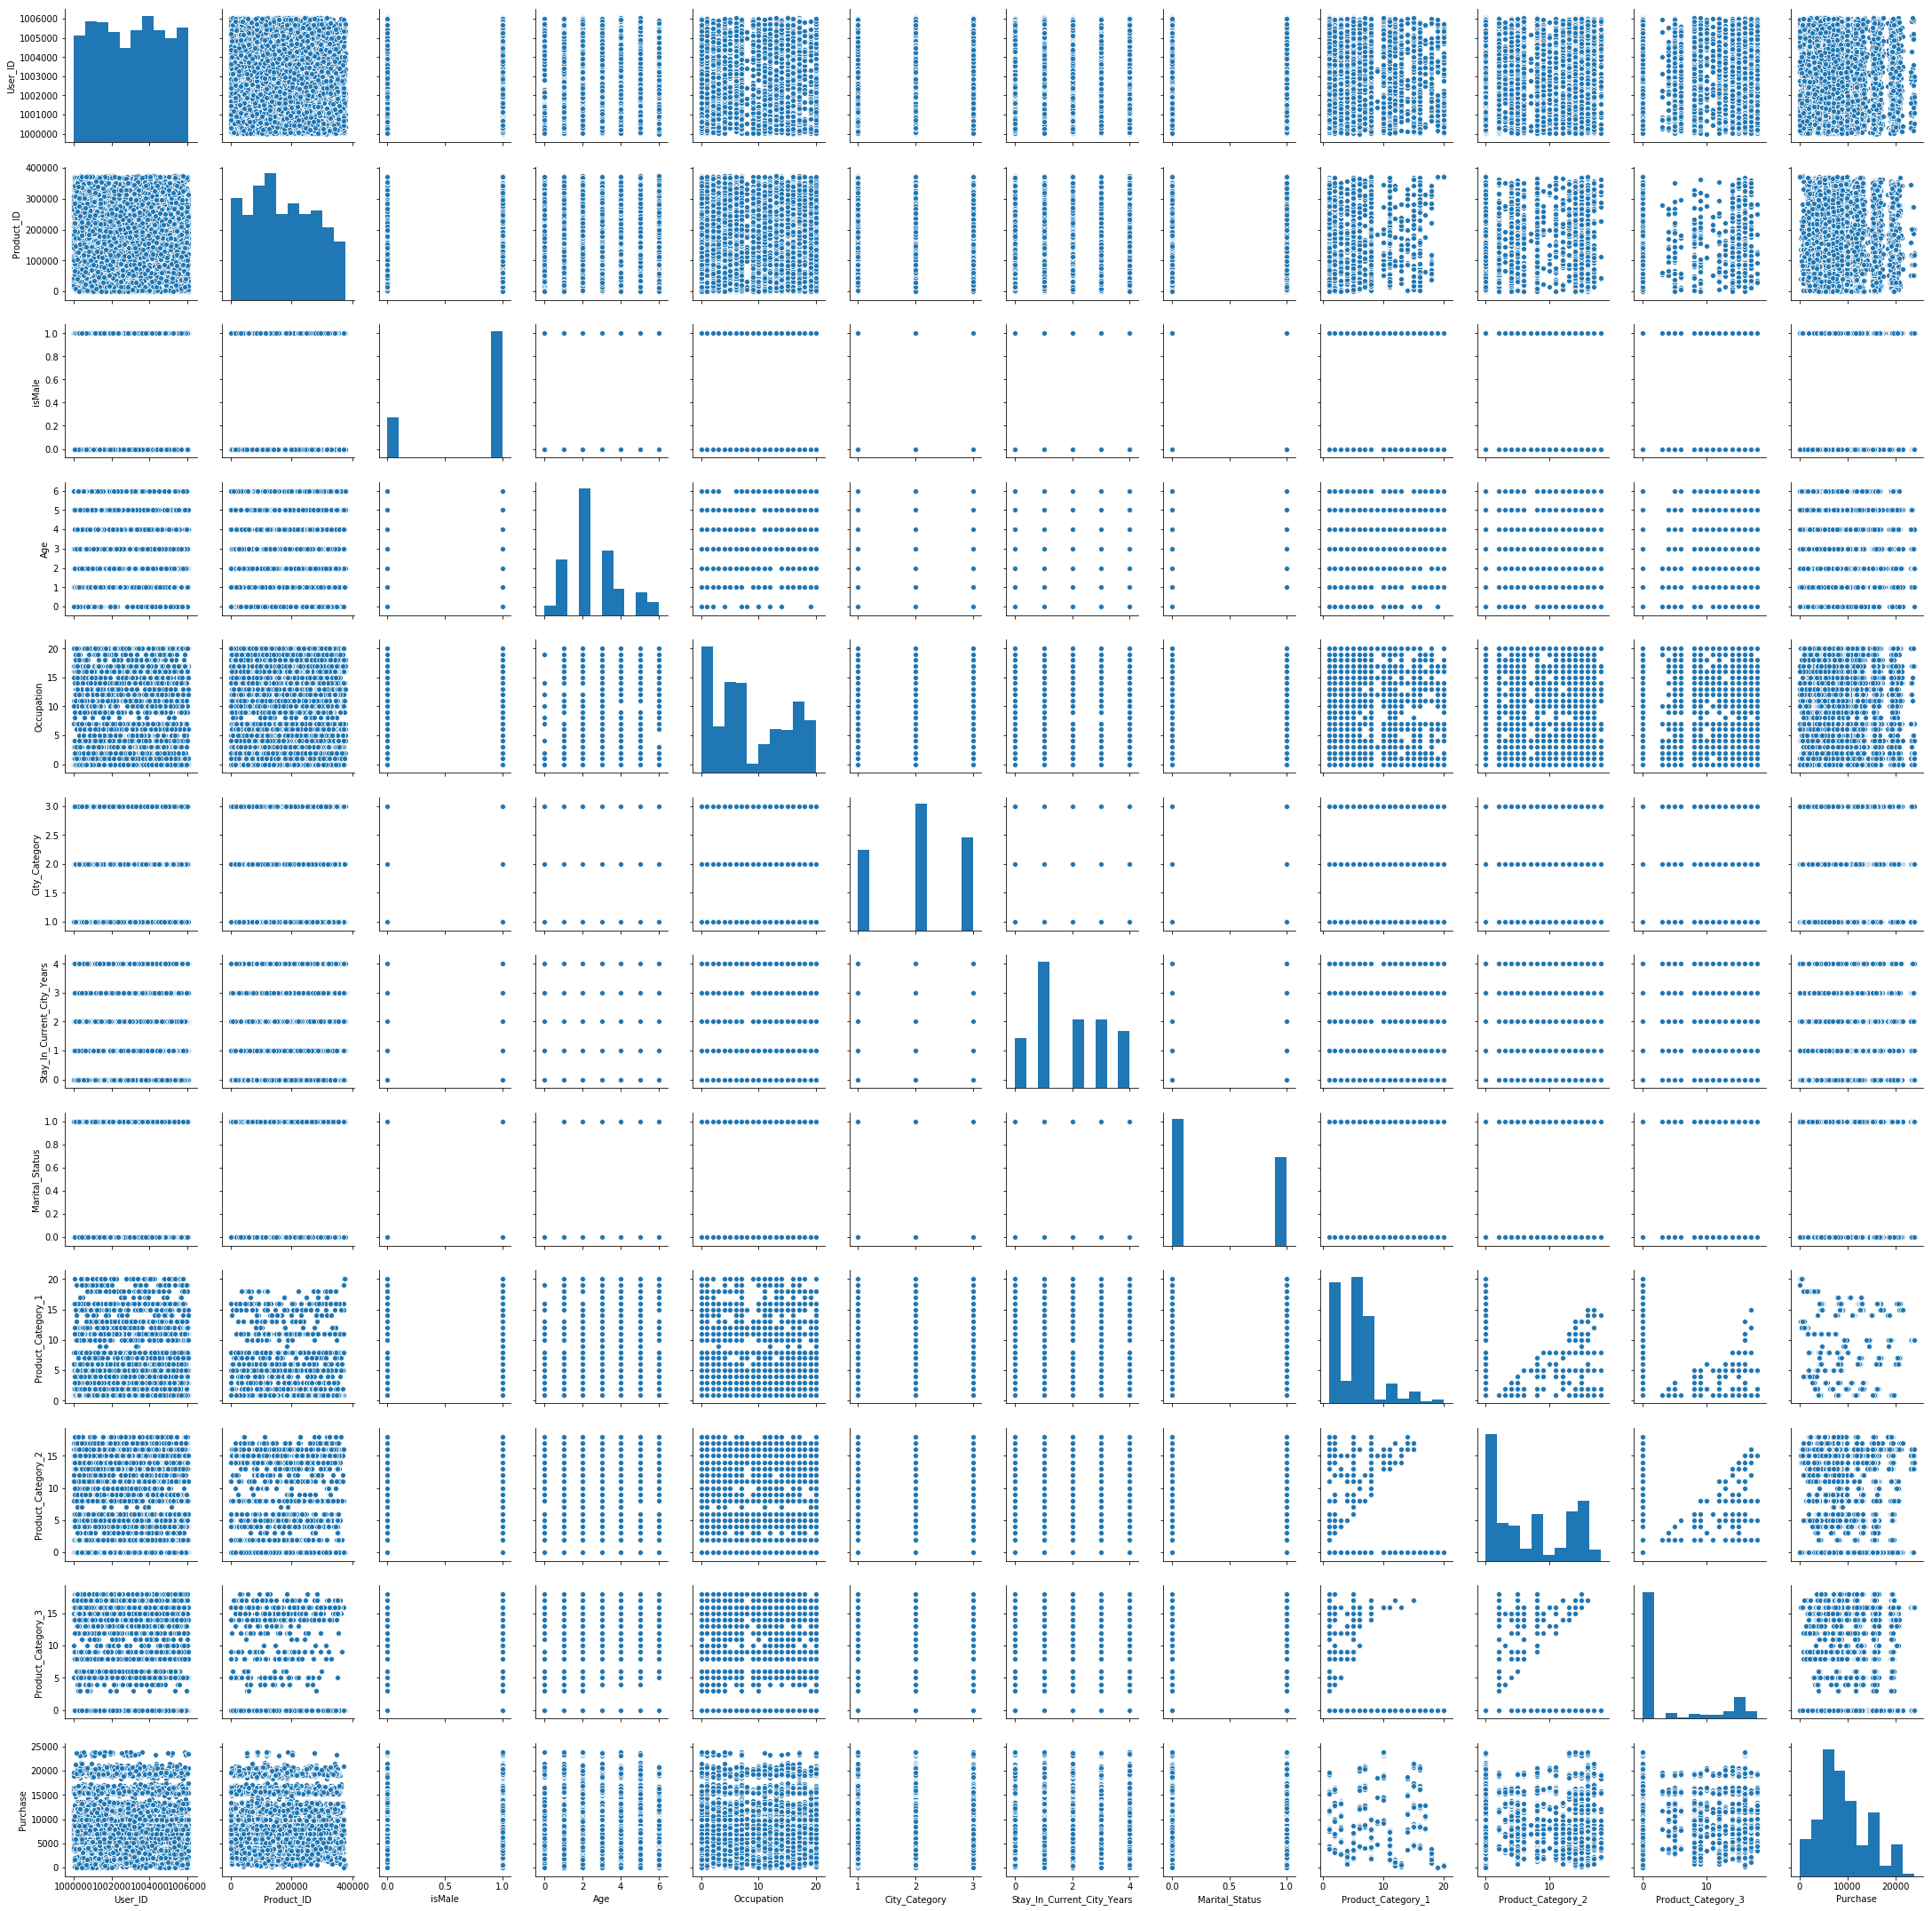

In [26]:
tempSlice = train.sample(n=10000) # Using a small slice to run a pairplot on - should give us an accurate idea of any relations while being efficient
sns.pairplot(tempSlice)

There appear to be relationships between the product categories.

In [27]:
prediction = multivar_model.predict(sm.add_constant(test.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)))

In [28]:
rmse(prediction,test['Purchase'])

4613.993784104981

Testing simple, single-var models

In [29]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    X = train[c]
    y = train.Purchase
    model = sm.OLS(y,sm.add_constant(X)).fit()
    print(c)
    print('Adjusted R-Squared: '+str(model.rsquared_adj))
    prediction = model.predict(sm.add_constant(test[c]))
    print('RMSE: '+str(rmse(prediction,test['Purchase'])))
    print('\n')

User_ID
Adjusted R-Squared: 1.684180273930913e-05
RMSE: 5014.364213243797


Product_ID
Adjusted R-Squared: 0.010806249777362109
RMSE: 4987.269457412458


isMale
Adjusted R-Squared: 0.0036810313191503186
RMSE: 5005.545709701308


Age
Adjusted R-Squared: 0.00025758682349352746
RMSE: 5013.862259212302


Occupation
Adjusted R-Squared: 0.00039480489155641063
RMSE: 5013.13887528159


City_Category
Adjusted R-Squared: 0.0038388980863207633
RMSE: 5004.863251359469


Marital_Status
Adjusted R-Squared: -2.5573086035457493e-06
RMSE: 5014.437745700809


Product_Category_1
Adjusted R-Squared: 0.11873520636802914
RMSE: 4712.74098899344


Product_Category_2
Adjusted R-Squared: 0.0028129863287551515
RMSE: 5008.062060489016


Product_Category_3
Adjusted R-Squared: 0.0833483802207835
RMSE: 4801.947064314609




Simple models do not beat the basic multivariate model on RMSE.

Testing individual parameter transformations in a multivariate model.

In [30]:
df.User_ID.eq(0).any()

False

In [31]:
for c in df.columns:
    if (c == 'Purchase' or c == 'Stay_In_Current_City_Years'): continue
    print(c)
    for t in ['square','sqrt','log']:
        loopDf = df.copy()
        if t == 'square': loopDf[c+'_'+t] = loopDf[c]**2
        elif t == 'sqrt': loopDf[c+'_'+t] = np.sqrt(loopDf[c])
        elif t == 'log': 
            if loopDf[c].eq(0).any() == True: #np.log will throw a divide by 0 error if 0 exists
                print('0 in '+c+', skipping')
                continue
            else: loopDf[c+'_'+t] = np.log(loopDf[c])
        loopDf.drop(c,axis=1,inplace=True)
        loopTrain, loopTest = train_test_split(loopDf,test_size=0.3)
        X = loopTrain.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
        y = loopTrain.Purchase
        model = sm.OLS(y,sm.add_constant(X)).fit()
        print(t)
        print('Adjusted R-Squared: '+str(model.rsquared_adj))
        prediction = model.predict(sm.add_constant(loopTest.drop(['Purchase', 'Stay_In_Current_City_Years'],axis=1)))
        print('RMSE: '+str(rmse(prediction,loopTest['Purchase'])))
    print('\n')

User_ID
square
Adjusted R-Squared: 0.15429580294499345
RMSE: 4611.283917020383
sqrt
Adjusted R-Squared: 0.15506785140084456
RMSE: 4618.065157882643
log
Adjusted R-Squared: 0.15601400847645885
RMSE: 4619.104477575029


Product_ID
square
Adjusted R-Squared: 0.15486224766292778
RMSE: 4599.79802510402
sqrt
Adjusted R-Squared: 0.15462403671093305
RMSE: 4611.610611184494
log
Adjusted R-Squared: 0.15250497558293008
RMSE: 4616.413289814515


isMale
square
Adjusted R-Squared: 0.15418910425806798
RMSE: 4604.256086245923
sqrt
Adjusted R-Squared: 0.15564810999614742
RMSE: 4624.2957122287435
0 in isMale, skipping


Age
square
Adjusted R-Squared: 0.1558002529440904
RMSE: 4624.673120450997
sqrt
Adjusted R-Squared: 0.15644559704322858
RMSE: 4637.21503807533
0 in Age, skipping


Occupation
square
Adjusted R-Squared: 0.15639769236205725
RMSE: 4634.614280494039
sqrt
Adjusted R-Squared: 0.15555884436200196
RMSE: 4621.596003411297
0 in Occupation, skipping


City_Category
square
Adjusted R-Squared: 0.15618

Certain transformations improve the RMSE, particularly log(Product_Category_1).

In [32]:
sorted(df.Purchase.unique(),reverse = True)

[23961,
 23960,
 23959,
 23958,
 23956,
 23955,
 23954,
 23953,
 23952,
 23951,
 23950,
 23949,
 23948,
 23947,
 23946,
 23945,
 23944,
 23943,
 23942,
 23941,
 23940,
 23939,
 23938,
 23937,
 23936,
 23935,
 23934,
 23933,
 23932,
 23931,
 23930,
 23929,
 23928,
 23927,
 23926,
 23925,
 23924,
 23923,
 23921,
 23920,
 23919,
 23918,
 23916,
 23915,
 23914,
 23913,
 23912,
 23911,
 23910,
 23909,
 23908,
 23907,
 23906,
 23905,
 23904,
 23903,
 23902,
 23900,
 23899,
 23898,
 23897,
 23896,
 23895,
 23894,
 23893,
 23892,
 23891,
 23890,
 23889,
 23888,
 23887,
 23885,
 23884,
 23883,
 23881,
 23879,
 23878,
 23877,
 23876,
 23875,
 23874,
 23871,
 23870,
 23869,
 23868,
 23867,
 23866,
 23865,
 23864,
 23863,
 23861,
 23860,
 23859,
 23858,
 23857,
 23856,
 23855,
 23854,
 23853,
 23852,
 23851,
 23850,
 23849,
 23848,
 23847,
 23846,
 23845,
 23844,
 23843,
 23842,
 23841,
 23840,
 23839,
 23838,
 23837,
 23836,
 23835,
 23834,
 23833,
 23831,
 23830,
 23829,
 23828,
 23827,
 23826,


In [33]:
import diagnostic_plots

KeyError: 75

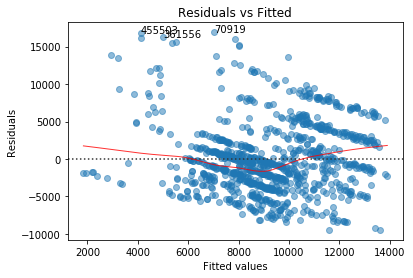

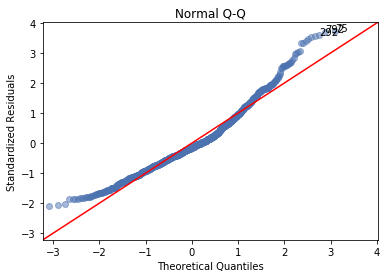

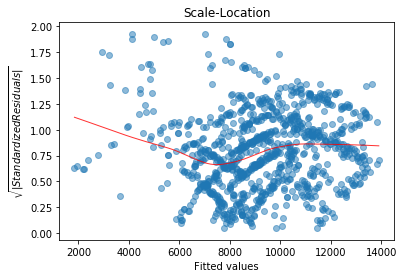

In [34]:
tempSlice = train.sample(n=1000)
X = tempSlice.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
y = tempSlice.Purchase
simple_model = sm.OLS(y,sm.add_constant(X)).fit()
diagnostic_plots.diagnostic_plots(X,y,model_fit=simple_model)

In [35]:
X.iloc[62]

User_ID               1003080
Product_ID              80642
isMale                      1
Age                         2
Occupation                 20
City_Category               1
Marital_Status              1
Product_Category_1          1
Product_Category_2         16
Product_Category_3          0
Name: 331365, dtype: int64

In [36]:
freq = np.unique(train.Purchase,return_counts = True)[1]
unique = np.unique(train.Purchase,return_counts = True)[0]

[]

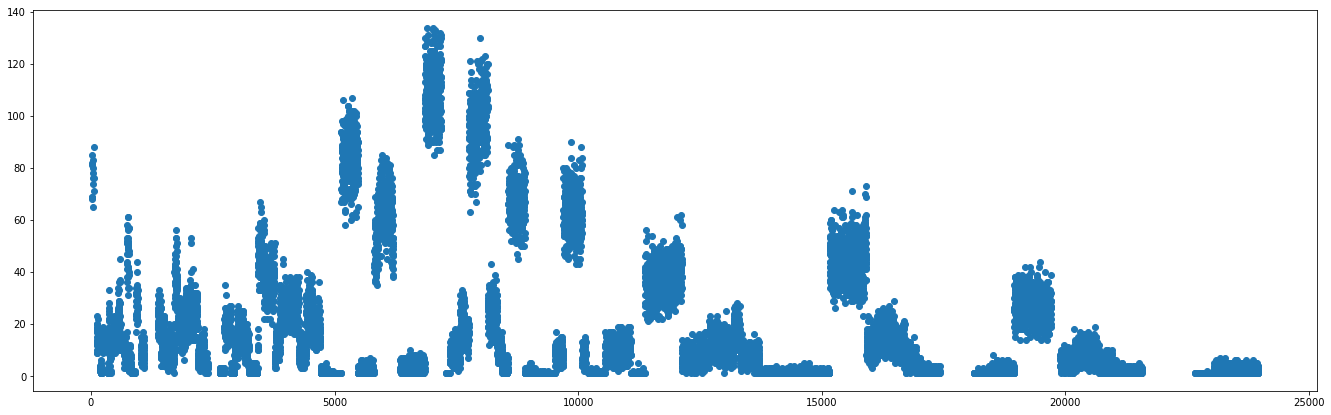

In [37]:
plt.figure(figsize=(23,7))
plt.scatter(unique,freq)
plt.plot()

In [38]:
lasso_model = LassoCV(alphas=np.logspace(-4,0,100),normalize=True,max_iter=100000,cv=5)
X = train.drop(columns=['Purchase','Stay_In_Current_City_Years'],axis=1)
y = train.Purchase

In [39]:
lasso_model.fit(X,y)

LassoCV(alphas=array([1.00000e-04, 1.09750e-04, ..., 9.11163e-01, 1.00000e+00]),
    copy_X=True, cv=5, eps=0.001, fit_intercept=True, max_iter=100000,
    n_alphas=100, n_jobs=None, normalize=True, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [40]:
lasso_predict = lasso_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [41]:
print(rmse(lasso_predict,test.Purchase))

4613.99335540007


In [42]:
ridge_model = RidgeCV(alphas=np.logspace(-5,0,100),normalize=True)

In [43]:
ridge_model.fit(X,y)
ridge_predict = ridge_model.predict(test.drop(['Purchase','Stay_In_Current_City_Years'],axis=1))

In [44]:
print(rmse(ridge_predict,test.Purchase))

4613.991281008714


In [45]:
df.Purchase.mean()

9263.968712959126

As per professor's suggestion, split on Purchase = 15000 (It's not exactly 15000, but close enough)

In [46]:
dfLow = df[(df.Purchase <= 15000)]
dfHigh = df[(df.Purchase > 15000)]

In [47]:
trainLow, testLow = train_test_split(dfLow,test_size=0.3)

In [48]:
Xlow = trainLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yLow = trainLow.Purchase

In [49]:
multivar_model = sm.OLS(yLow,sm.add_constant(Xlow)).fit()

In [50]:
predict = multivar_model.predict(sm.add_constant(testLow.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testLow.Purchase))

2869.9274852716026


In [51]:
multivar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     5278.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:19:47   Log-Likelihood:            -2.8860e+06
No. Observations:              307681   AIC:                         5.772e+06
Df Residuals:                  307670   BIC:                         5.772e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.275e+04   3006.128      4.243      0.000    6862.551    1.86e+04
User_ID               -0.0043      0.003     -1.419      0.156      -0.010       0.002
Product_ID            -0.0010   5.06e-05    -19.081      0.000      -0.001      -0.001
isMale                77.8666     11.890      6.549      0.000      54.563     101.170
Age                   98.2551      4.073     24.124      0.000      90.272     106.238
Occupation             1.8538      0.799      2.321      0.020       0.288       3.419
City_Category        116.2556      6.868     16.927      0.000     102.794     129.717
Marital_Status       -23.6053     11.063     -2.134      0.033     -45.289      -1.921
Product_Category_1  -291.2476      1.515   -192.183      0.000    -294.218    -288.277
Product_Category_2    -9.0379      0.831    -10.879      0.000     -10.666      -7.410
Product_Category_3    45.1540      0.965     46.813      0.000      43.263      47.045
==============================================================================
Omnibus:                      184.759   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.935
Skew:                           0.053   Prob(JB):                     1.89e-40
Kurtosis:                       2.946   Cond. No.                     5.93e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.93e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [52]:
trainHigh, testHigh = train_test_split(dfHigh,test_size=0.3)


In [53]:
Xhigh = trainHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)
yHigh = trainHigh.Purchase

In [54]:
multivar_model_high = sm.OLS(yHigh,sm.add_constant(Xhigh)).fit()

In [55]:
predict = multivar_model_high.predict(sm.add_constant(testHigh.drop(['Purchase','Stay_In_Current_City_Years'],axis=1)))
print(rmse(predict,testHigh.Purchase))

1969.1012351015568


In [57]:
multivar_model_high.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Purchase   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     1186.
Date:                Sat, 01 Dec 2018   Prob (F-statistic):               0.00
Time:                        17:19:47   Log-Likelihood:            -6.9673e+05
No. Observations:               77366   AIC:                         1.393e+06
Df Residuals:                   77355   BIC:                         1.394e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.866e+04   4121.644      4.528      0.000    1.06e+04    2.67e+04
User_ID               -0.0019      0.004     -0.461      0.645      -0.010       0.006
Product_ID            -0.0027   7.37e-05    -36.975      0.000      -0.003      -0.003
isMale                22.5085     18.068      1.246      0.213     -12.904      57.921
Age                    3.9525      5.578      0.709      0.479      -6.980      14.885
Occupation            -0.7505      1.115     -0.673      0.501      -2.935       1.434
City_Category         87.6899      9.400      9.329      0.000      69.266     106.114
Marital_Status        -3.0800     15.186     -0.203      0.839     -32.844      26.685
Product_Category_1   167.9898      1.746     96.238      0.000     164.568     171.411
Product_Category_2    34.8632      1.233     28.282      0.000      32.447      37.279
Product_Category_3     5.0869      1.096      4.642      0.000       2.939       7.235
==============================================================================
Omnibus:                    53272.331   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7707.309
Skew:                           0.509   Prob(JB):                         0.00
Kurtosis:                       1.836   Cond. No.                     5.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
trainHigh.count()

User_ID                       77366
Product_ID                    77366
isMale                        77366
Age                           77366
Occupation                    77366
City_Category                 77366
Stay_In_Current_City_Years    77366
Marital_Status                77366
Product_Category_1            77366
Product_Category_2            77366
Product_Category_3            77366
Purchase                      77366
dtype: int64

In [59]:
dfHigh.count()

User_ID                       110523
Product_ID                    110523
isMale                        110523
Age                           110523
Occupation                    110523
City_Category                 110523
Stay_In_Current_City_Years    110523
Marital_Status                110523
Product_Category_1            110523
Product_Category_2            110523
Product_Category_3            110523
Purchase                      110523
dtype: int64

In [60]:
dfLow.count()

User_ID                       439545
Product_ID                    439545
isMale                        439545
Age                           439545
Occupation                    439545
City_Category                 439545
Stay_In_Current_City_Years    439545
Marital_Status                439545
Product_Category_1            439545
Product_Category_2            439545
Product_Category_3            439545
Purchase                      439545
dtype: int64